In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("arifmia/marine-fish-dataset")

# print("Path to dataset files:", path)

/Users/charlbotha/.local/share/virtualenvs/marine_fish_analysis_dashboard-il0dFipY/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7.05k/7.05k [00:00<00:00, 6.78MB/s]

Extracting files...
Path to dataset files: /Users/charlbotha/.cache/kagglehub/datasets/arifmia/marine-fish-dataset/versions/1


In [7]:
# Read the csv into a pandas data frame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fish_data = pd.read_csv('../data/raw/Marine_Fish_Data.csv', header=0)
fish_data.head()

Matplotlib is building the font cache; this may take a moment.


,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
0,Salmon,North Atlantic,Summer,Net,8270,71.92,No,24.68,High
1,Tuna,Pacific Ocean,Monsoon,Line,1860,85.33,No,21.33,High
2,Cod,Mediterranean Sea,Summer,Line,6390,88.02,No,16.98,Medium
3,Herring,Pacific Ocean,Monsoon,Trawl,6191,85.46,Yes,28.51,Low
4,Herring,Indian Ocean,Monsoon,Trawl,6734,48.35,Yes,25.37,Low


# What are the questions we want to ask about the data? 
- How many species of fish per region
- Correlation between water temp and pollution level? 
- Polliution levev vs overfish risk
- group by fishing method
- Fishing method with water temp
- Breeding season, region and water temp
- Average size vs water temp

In [23]:
# Basic data exploration
def explore_basic_info(df):
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    print("\nBasic Statistics:")
    print(df.describe())

explore_basic_info(fish_data)

Dataset Shape: (500, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species_Name           500 non-null    object 
 1   Region                 500 non-null    object 
 2   Breeding_Season        500 non-null    object 
 3   Fishing_Method         500 non-null    object 
 4   Fish_Population        500 non-null    int64  
 5   Average_Size(cm)       500 non-null    float64
 6   Overfishing_Risk       500 non-null    object 
 7   Water_Temperature(C)   500 non-null    float64
 8   Water_Pollution_Level  500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB
None

Basic Statistics:
       Fish_Population  Average_Size(cm)  Water_Temperature(C)
count       500.000000        500.000000            500.000000
mean       5628.790000         56.022960             22.552300
std      

In [24]:
# Some more statistical analysis

print("\nSummary Statistics by Region:")
print(fish_data.groupby('Region')['Fish_Population'].describe())

print("\nAverage Fish Size by Overfishing Risk:")
print(fish_data.groupby('Overfishing_Risk')['Average_Size(cm)'].mean())


Summary Statistics by Region:
                   count         mean          std     min      25%     50%  \
Region                                                                        
Indian Ocean       108.0  5547.000000  2678.328740  1189.0  3128.75  5647.0   
Mediterranean Sea  139.0  5768.884892  2432.339448  1154.0  3765.00  6073.0   
North Atlantic     117.0  5850.794872  2450.735929  1064.0  4124.00  5869.0   
Pacific Ocean      136.0  5359.566176  2615.364907  1004.0  2940.00  5527.0   

                       75%     max  
Region                              
Indian Ocean       8071.75  9958.0  
Mediterranean Sea  7819.50  9996.0  
North Atlantic     8022.00  9924.0  
Pacific Ocean      7424.75  9945.0  

Average Fish Size by Overfishing Risk:
Overfishing_Risk
No     54.179137
Yes    57.942041
Name: Average_Size(cm), dtype: float64


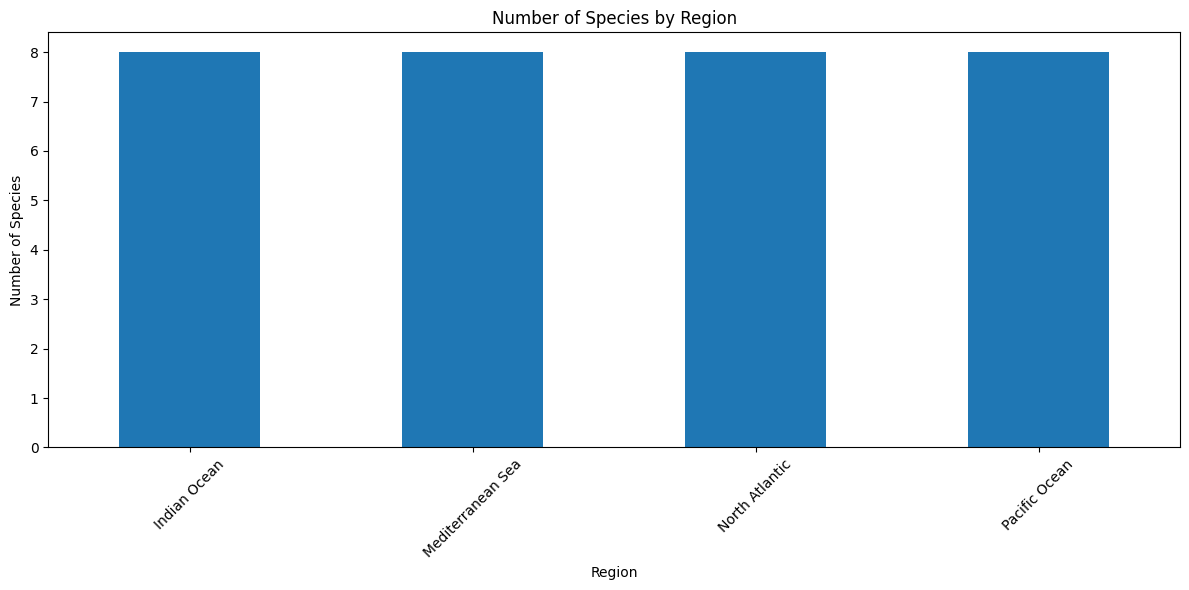


Species Distribution by Region:
Region
Indian Ocean         8
Mediterranean Sea    8
North Atlantic       8
Pacific Ocean        8
Name: Species_Name, dtype: int64


In [25]:
# Species distribution by region
def analyze_species_distribution(df):
    species_by_region = df.groupby('Region')['Species_Name'].nunique()
    
    plt.figure(figsize=(12, 6))
    species_by_region.plot(kind='bar')
    plt.title('Number of Species by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Species')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nSpecies Distribution by Region:")
    print(species_by_region)

analyze_species_distribution(fish_data)

In [26]:
species_number = fish_data['Species_Name'].nunique()

print('\nSpiecies count')
print(species_number)


Spiecies count
8


Only 8 species are considered accross different regions

We have 4 regions, and we list the same 8 species for every region

But there are further repitions. What are they?

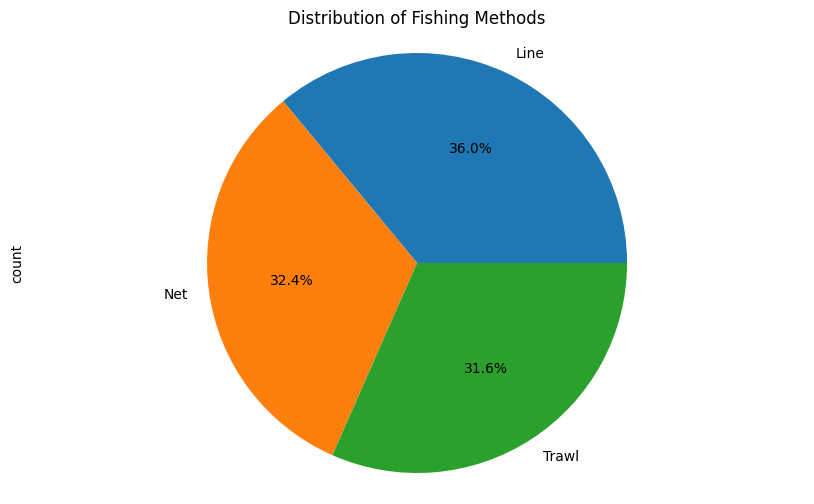

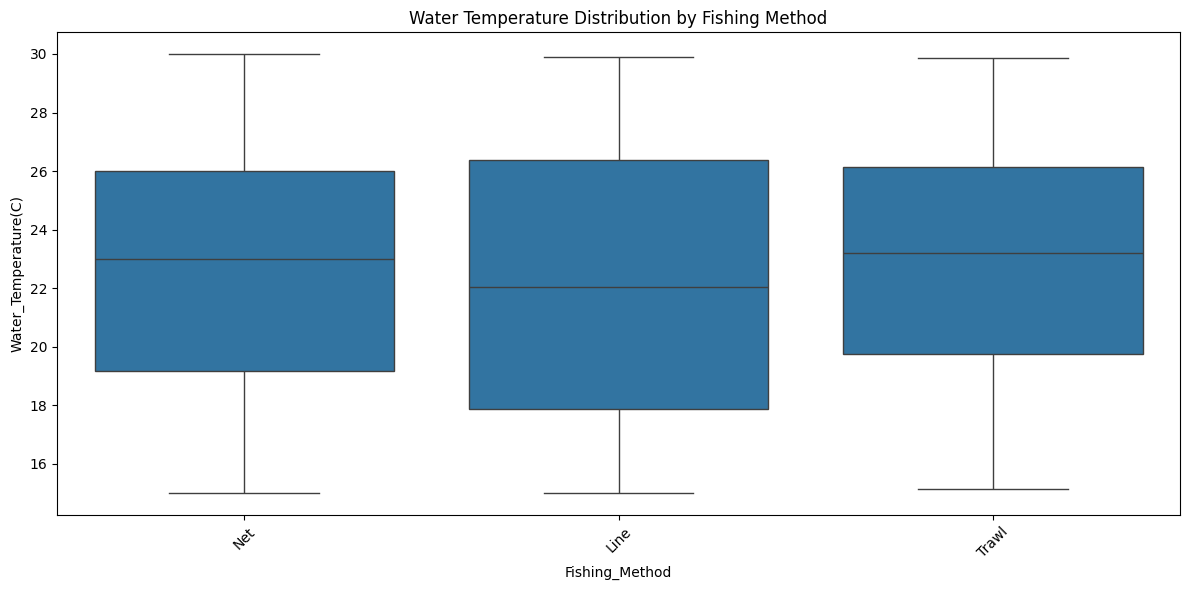

In [28]:
# Fishing method analysis
def count_fishing_methods(df):
    # Count of fishing methods
    fishing_methods = df['Fishing_Method'].value_counts()
    
    plt.figure(figsize=(10, 6))
    fishing_methods.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Fishing Methods')
    plt.axis('equal')
    plt.show()
    
    # Box plot of water temperature by fishing method
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Fishing_Method', y='Water_Temperature(C)')
    plt.title('Water Temperature Distribution by Fishing Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

count_fishing_methods(fish_data)

I'm considering adding another table in here to better indicate the distribution. Maybe a scatterplot? 

<Figure size 1200x600 with 0 Axes>

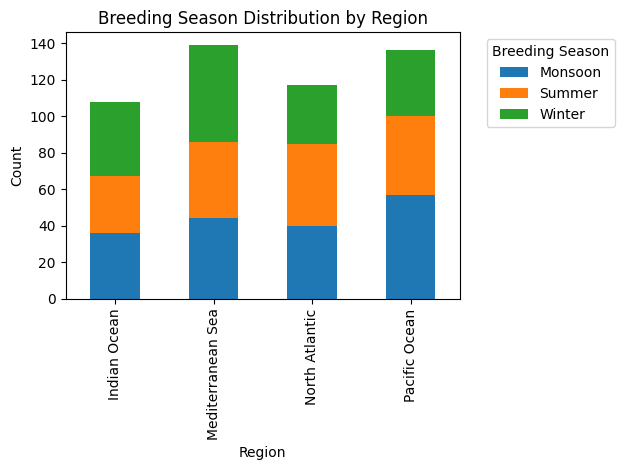

In [29]:
# Seasonal analysis
def analyze_seasonal_patterns(df):
    seasonal_data = pd.crosstab(df['Region'], df['Breeding_Season'])
    
    plt.figure(figsize=(12, 6))
    seasonal_data.plot(kind='bar', stacked=True)
    plt.title('Breeding Season Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.legend(title='Breeding Season', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

analyze_seasonal_patterns(fish_data)

I don't really like this graph at all - reading it always confuses me
Need to learn more about what *cross tabulation* is and how the bar graph displays that information 

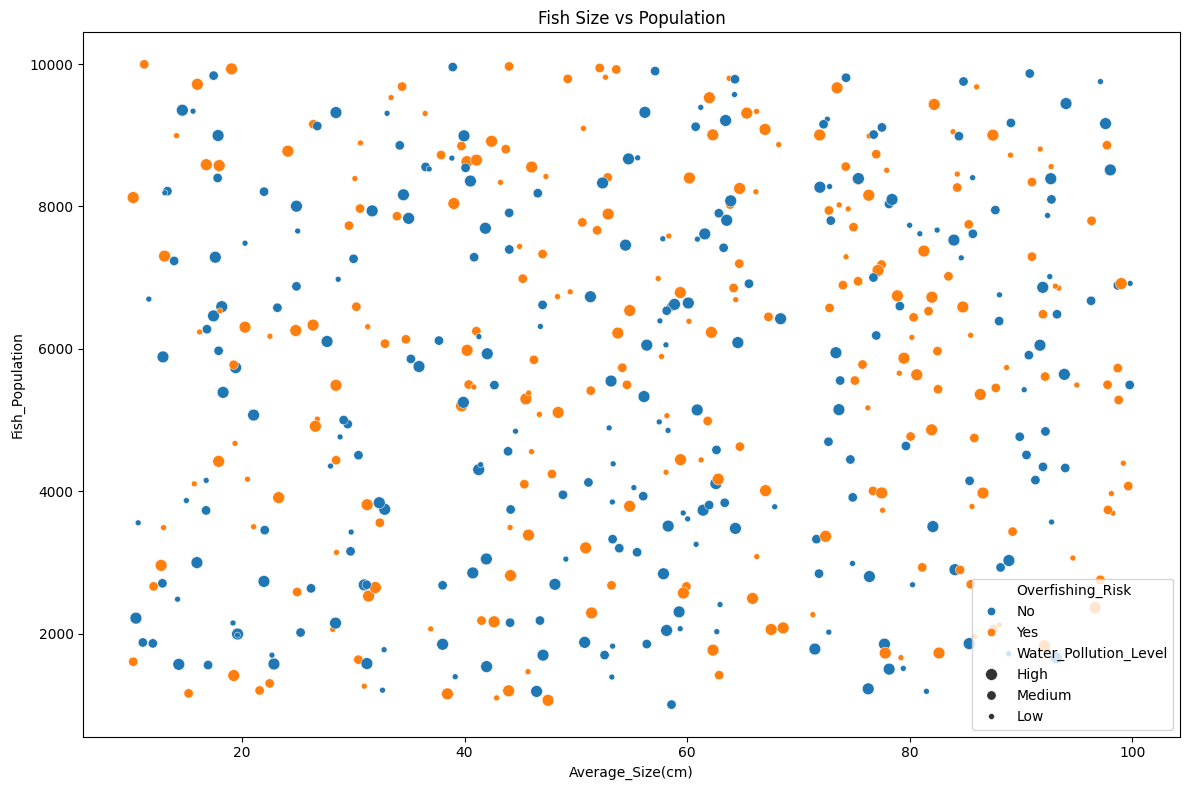

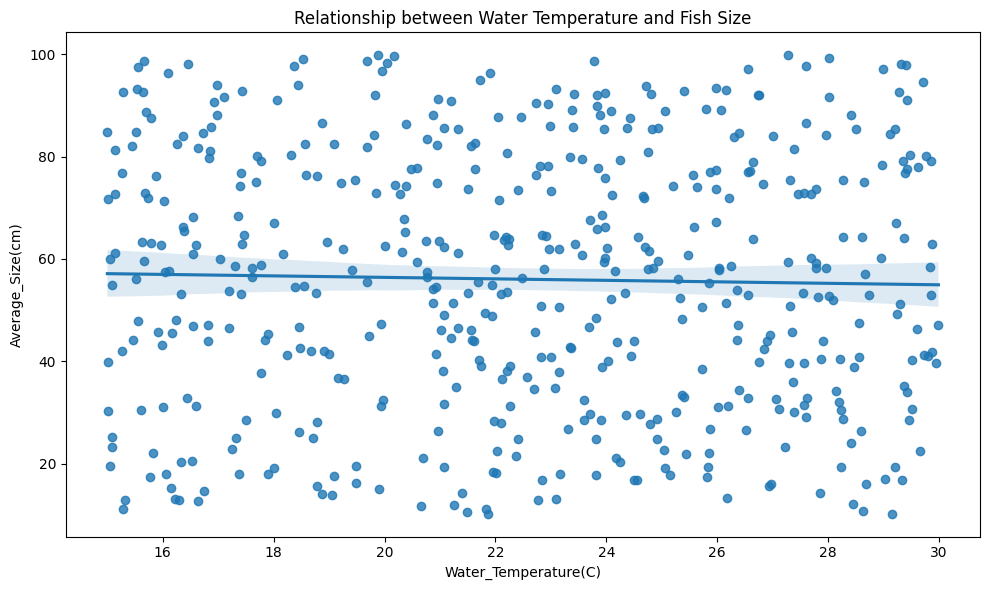

In [30]:
# Size and population analysis
def analyze_size_relationships(df):
    # Scatter plot of size vs population with multiple features
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Average_Size(cm)', y='Fish_Population',
                    hue='Overfishing_Risk', size='Water_Pollution_Level')
    plt.title('Fish Size vs Population')
    plt.tight_layout()
    plt.show()
    
    # Correlation between size and water temperature
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='Water_Temperature(C)', y='Average_Size(cm)')
    plt.title('Relationship between Water Temperature and Fish Size')
    plt.tight_layout()
    plt.show()

analyze_size_relationships(fish_data)

This dataset looks very very uniform and not particularly interesting

Another way to consider this is that I am not skilled enough to see the patterns quite yet
still more analysis to go, will keep thinking of quesitons to ask and how to better understand and display the data